In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import mlflow
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from pycaret.regression import setup, compare_models, plot_model, evaluate_model, stack_models

from lib.reproduction import major_oxides



In [3]:
from lib import full_flow_dataloader
from lib.config import AppConfig

mlflow.set_tracking_uri(AppConfig().mlflow_tracking_uri)

drop_cols = ["ID", "Sample Name"]

train_processed, test_processed = full_flow_dataloader.load_full_flow_data(load_cache_if_exits=True, average_shots=True)
target = major_oxides[0]

drop_cols.extend([oxide for oxide in major_oxides if oxide != target])
train_processed = train_processed.drop(columns=drop_cols)
test_processed = test_processed.drop(columns=drop_cols)


In [4]:
train_processed.head()

,240.811,240.86501,240.918,240.972,241.02699,241.07899,241.133,241.188,241.24001,241.29401,241.34801,241.401,241.45599,241.508,241.562,241.616,241.66901,241.72301,241.77699,241.83,241.883,241.938,241.991,242.045,242.099,242.151,242.20599,242.259,242.312,242.366,242.42,242.47301,242.52699,242.58,242.634,242.687,242.74001,242.79401,242.84801,242.89999,...,898.22827,898.422,898.61572,898.80939,899.00311,899.19672,899.39032,899.58392,899.77753,899.97101,900.16449,900.35797,900.55151,900.74487,900.93842,901.13177,901.32507,901.51849,901.71191,901.90521,902.09839,902.29169,902.48492,902.6781,902.87128,903.06451,903.25763,903.45068,903.64392,903.83691,904.03003,904.22302,904.41602,904.60889,904.80188,904.99481,905.18768,905.38062,905.57349,SiO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.13


In [5]:
test_processed.head()

,240.811,240.86501,240.918,240.972,241.02699,241.07899,241.133,241.188,241.24001,241.29401,241.34801,241.401,241.45599,241.508,241.562,241.616,241.66901,241.72301,241.77699,241.83,241.883,241.938,241.991,242.045,242.099,242.151,242.20599,242.259,242.312,242.366,242.42,242.47301,242.52699,242.58,242.634,242.687,242.74001,242.79401,242.84801,242.89999,...,898.22827,898.422,898.61572,898.80939,899.00311,899.19672,899.39032,899.58392,899.77753,899.97101,900.16449,900.35797,900.55151,900.74487,900.93842,901.13177,901.32507,901.51849,901.71191,901.90521,902.09839,902.29169,902.48492,902.6781,902.87128,903.06451,903.25763,903.45068,903.64392,903.83691,904.03003,904.22302,904.41602,904.60889,904.80188,904.99481,905.18768,905.38062,905.57349,SiO2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.43


In [6]:
regression_setup = setup(
    data=train_processed, target=target, session_id=123,
    log_experiment=True, experiment_name="Pycaret",
    log_plots=True, log_data=True, test_data=test_processed,
    index=False
)

,Description,Value
0,Session id,123
1,Target,SiO2
2,Target type,Regression
3,Original data shape,"(1928, 6145)"
4,Transformed data shape,"(1928, 6145)"
5,Transformed train set shape,"(1538, 6145)"
6,Transformed test set shape,"(390, 6145)"
7,Numeric features,6144
8,Preprocess,True
9,Imputation type,simple


In [7]:
best_models = compare_models(exclude=["lightgbm"], n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,3.4861,31.4281,5.2432,0.8781,0.1729,0.2474,16.2890
rf,Random Forest Regressor,3.6584,33.5369,5.4108,0.8713,0.1646,0.2680,53.1720
gbr,Gradient Boosting Regressor,3.6022,34.0928,5.4635,0.8682,0.1727,0.2090,25.4110
llar,Lasso Least Angle Regression,3.7212,35.0387,5.7585,0.8459,0.2106,0.4647,0.3860
ada,AdaBoost Regressor,4.5741,44.2991,6.4064,0.8165,0.2337,0.7223,9.1040
lasso,Lasso Regression,4.8020,53.1382,6.9071,0.7889,0.2413,0.5323,1.3130
en,Elastic Net,4.8019,53.1382,6.9071,0.7889,0.2413,0.5323,1.0510
ridge,Ridge Regression,4.3278,54.0458,6.9264,0.7846,0.2737,0.8218,0.5400
huber,Huber Regressor,4.7204,50.8987,7.0093,0.7759,0.2441,0.8274,6.0980
lr,Linear Regression,5.0998,59.0478,7.2509,0.7659,0.3138,1.1191,2.6750


/home/christian/projects/p9/baseline/kenv/lib/python3.11/site-packages/pycaret/internal/pycaret_experiment/supervised_experiment.py:339: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  .applymap(highlight_cols, subset=["TT (Sec)"])
/home/christian/projects/p9/baseline/kenv/lib/python3.11/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


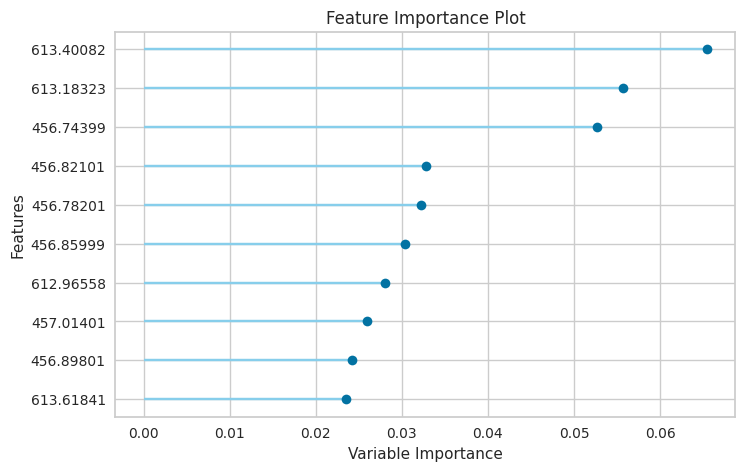

In [8]:
plot_model(best_models[0], plot = 'feature')

In [9]:
stacker = stack_models(best_models)
evaluate_model(stacker)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:09:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Regressor


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

KeyboardInterrupt: 